<a href="https://colab.research.google.com/github/DCI-alxogm/ml2023-DPM2310/blob/main/Ago25-26/Tarea3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tarea 3**

1.Crear una función que ajuste los pesos para un modelo dado como argumento el grado del polinomio ajustado. La función debe devolver el costo total en el conjunto de datos dado como entrenamiento.

2.Crear una función que calcule el costo de un modelo ya ajustado pero ahora en el conjunto de validación.

3.Hacer una gráfica del costo en el conjunto de entrenamiento Vs el grado del polinomio y otra del costo en el conjunto de validación Vs el grado del polinomio.

4.Hacer una función qué calcule el costo de cross-validación con K=N y graficar el costo de cross-validación como función del grado del polinomio.
Trabajar hasta el grado igual 8 en todos los casos.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')
file ="/content/drive/MyDrive/Data/olympic100m_men.txt"
data=np.loadtxt(file,delimiter=",").T

Mounted at /content/drive


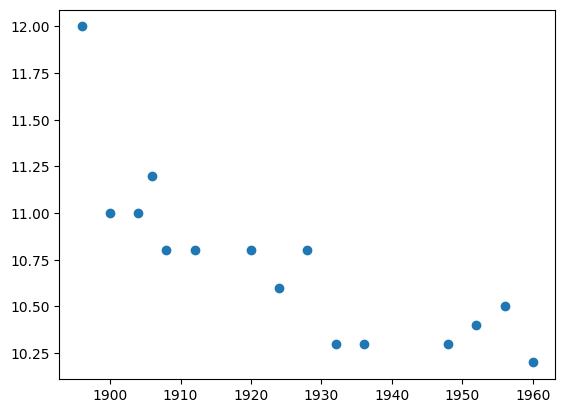

In [23]:
#Seleccionamos nuestro conjunto de entrenamiento
x=data[0][0:15]
t=data[1][0:15]
plt.scatter(x,t)

In [71]:
X = np.hstack((np.ones_like(x),x))
t = t

In [72]:
XX = np.matmul(X.T,X)

In [74]:
XX = np.dot(X.T,X)
invXX = np.linalg.inv(XX)
Xt = np.dot(X.T,t)
w = np.dot(invXX,Xt)
print(w)

[[ 3.64164559e+01]
 [-1.33308857e-02]]


In [75]:
testx = np.linspace(1896,2012,100)[:,None]
testX = np.hstack((np.ones_like(testx),testx))
testt = np.dot(testX,w)

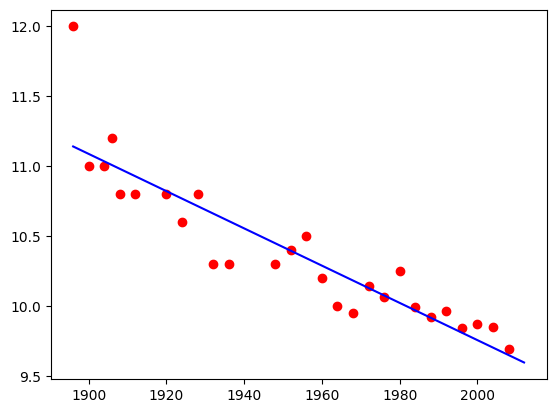

In [76]:
plt.figure()
plt.plot(x,t,'ro')
plt.plot(testx,testt,'b')

In [77]:
X = np.hstack((np.ones_like(x),x,x**2))
XX = np.dot(X.T,X)
invXX = np.linalg.inv(XX)
Xt = np.dot(X.T,t)
w = np.dot(invXX,Xt)
w

array([[ 4.55597856e+02],
       [-4.43160486e-01],
       [ 1.10151552e-04]])

In [78]:
testx = np.linspace(1896,2012,100)[:,None]
testX = np.hstack((np.ones_like(testx),testx,testx**2))
testt = np.dot(testX,w)

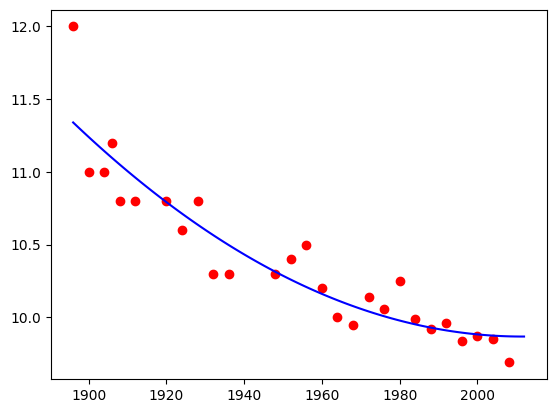

In [79]:
plt.figure()
plt.plot(x,t,'ro')
plt.plot(testx,testt,'b')

In [85]:
X = np.hstack((np.ones_like(x),x,x**2,x**3))
XX = np.dot(X.T,X)
invXX = np.linalg.inv(XX)
Xt = np.dot(X.T,t)
w = np.dot(invXX,Xt)
w

array([[ 2.36818037e+04],
       [-3.61433840e+01],
       [ 1.83980470e-02],
       [-3.12217247e-06]])

In [86]:
testx = np.linspace(1896,2012,100)[:,None]
testX = np.hstack((np.ones_like(testx),testx,testx**2,testx**3))
testt = np.dot(testX,w)

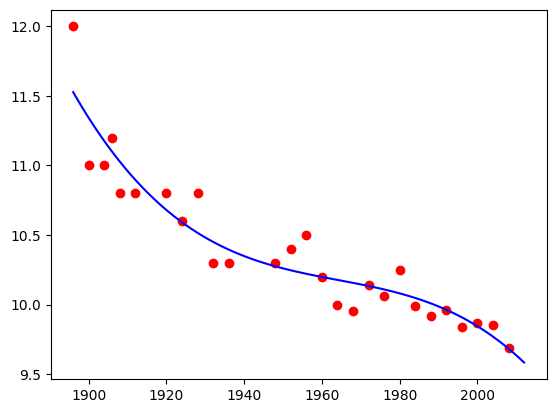

In [87]:
plt.figure()
plt.plot(x,t,'ro')
plt.plot(testx,testt,'b')